In [3]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt

os.getcwd()

'/home/lamda/rachu/EPPFL/results'

In [4]:
# h5_files = ["mnist_FedCE_0 + '_' + dct + '_' 10 + '_' + 5e-05+ '_' +2024-10-07 07:12:42.139155.h5",
# "mnist_FedCE_0 + '_' + fft + '_' 10 + '_' + 5e-05+ '_' +2024-10-07 02:54:53.162785.h5",
# "mnist_FedCE_0 + '_' + had + '_' 10 + '_' + 5e-05+ '_' +2024-10-07 09:08:15.524427.h5",
# "mnist_FedCE_0 + '_' + wav + '_' 10 + '_' + 5e-05+ '_' +2024-10-06 23:46:27.545489.h5"
# ]

h5_files = ["mnist_FedCE_0 + '_' + dct + '_' 10 + '_' + 5e-05+ '_' +2024-10-07 15:59:54.011097.h5",
"mnist_FedCE_0 + '_' + fft + '_' 10 + '_' + 5e-05+ '_' +2024-10-07 21:02:19.111072.h5",
"mnist_FedCE_0 + '_' + had + '_' 10 + '_' + 5e-05+ '_' +2024-10-07 20:17:22.844805.h5",
"mnist_FedCE_0 + '_' + wav + '_' 10 + '_' + 5e-05+ '_' +2024-10-07 18:47:26.215852.h5"]
# Dictionary to store data from all files
metrics = ['rs_test_acc', 'rs_train_loss']
combined_data = {metric: {} for metric in metrics}


# Read data from each H5 file
for file in h5_files:
    with h5py.File("/home/lamda/rachu/EPPFL/results/" + file, 'r') as f:
        for metric in metrics:
            if metric in f:
                combined_data[metric][file] = f[metric][()]



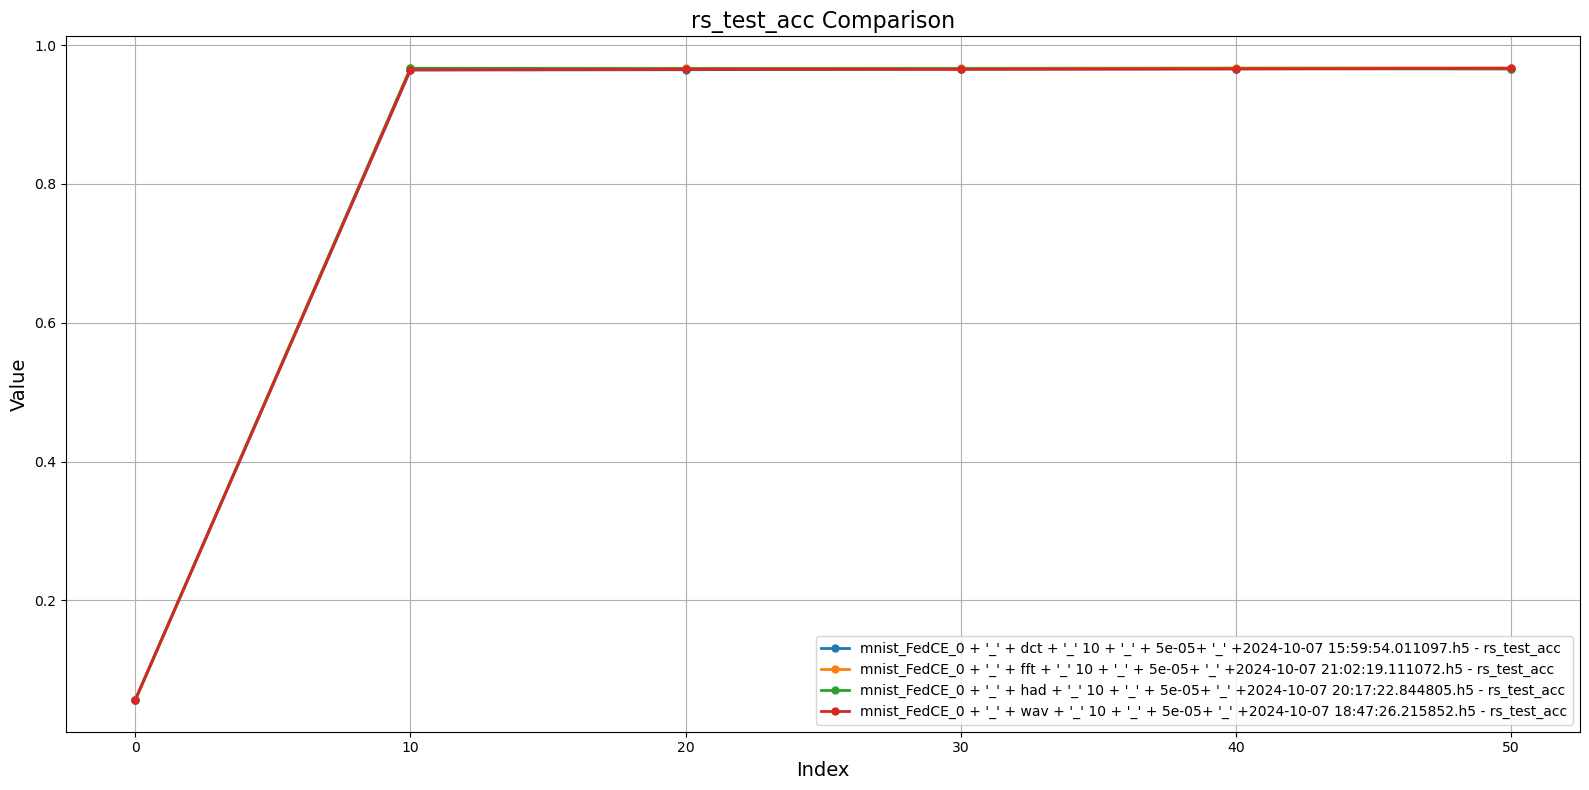

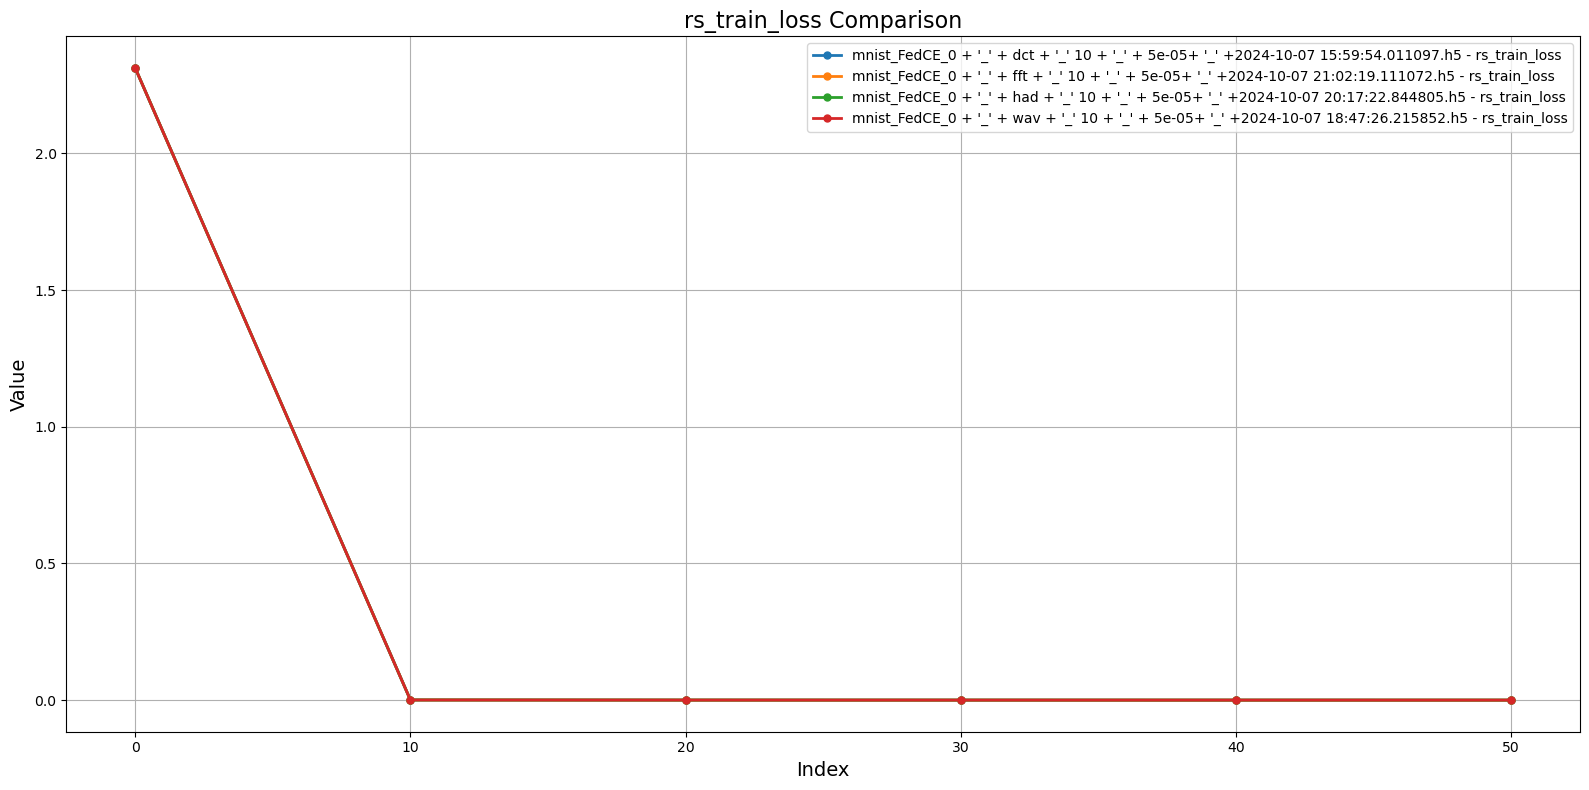

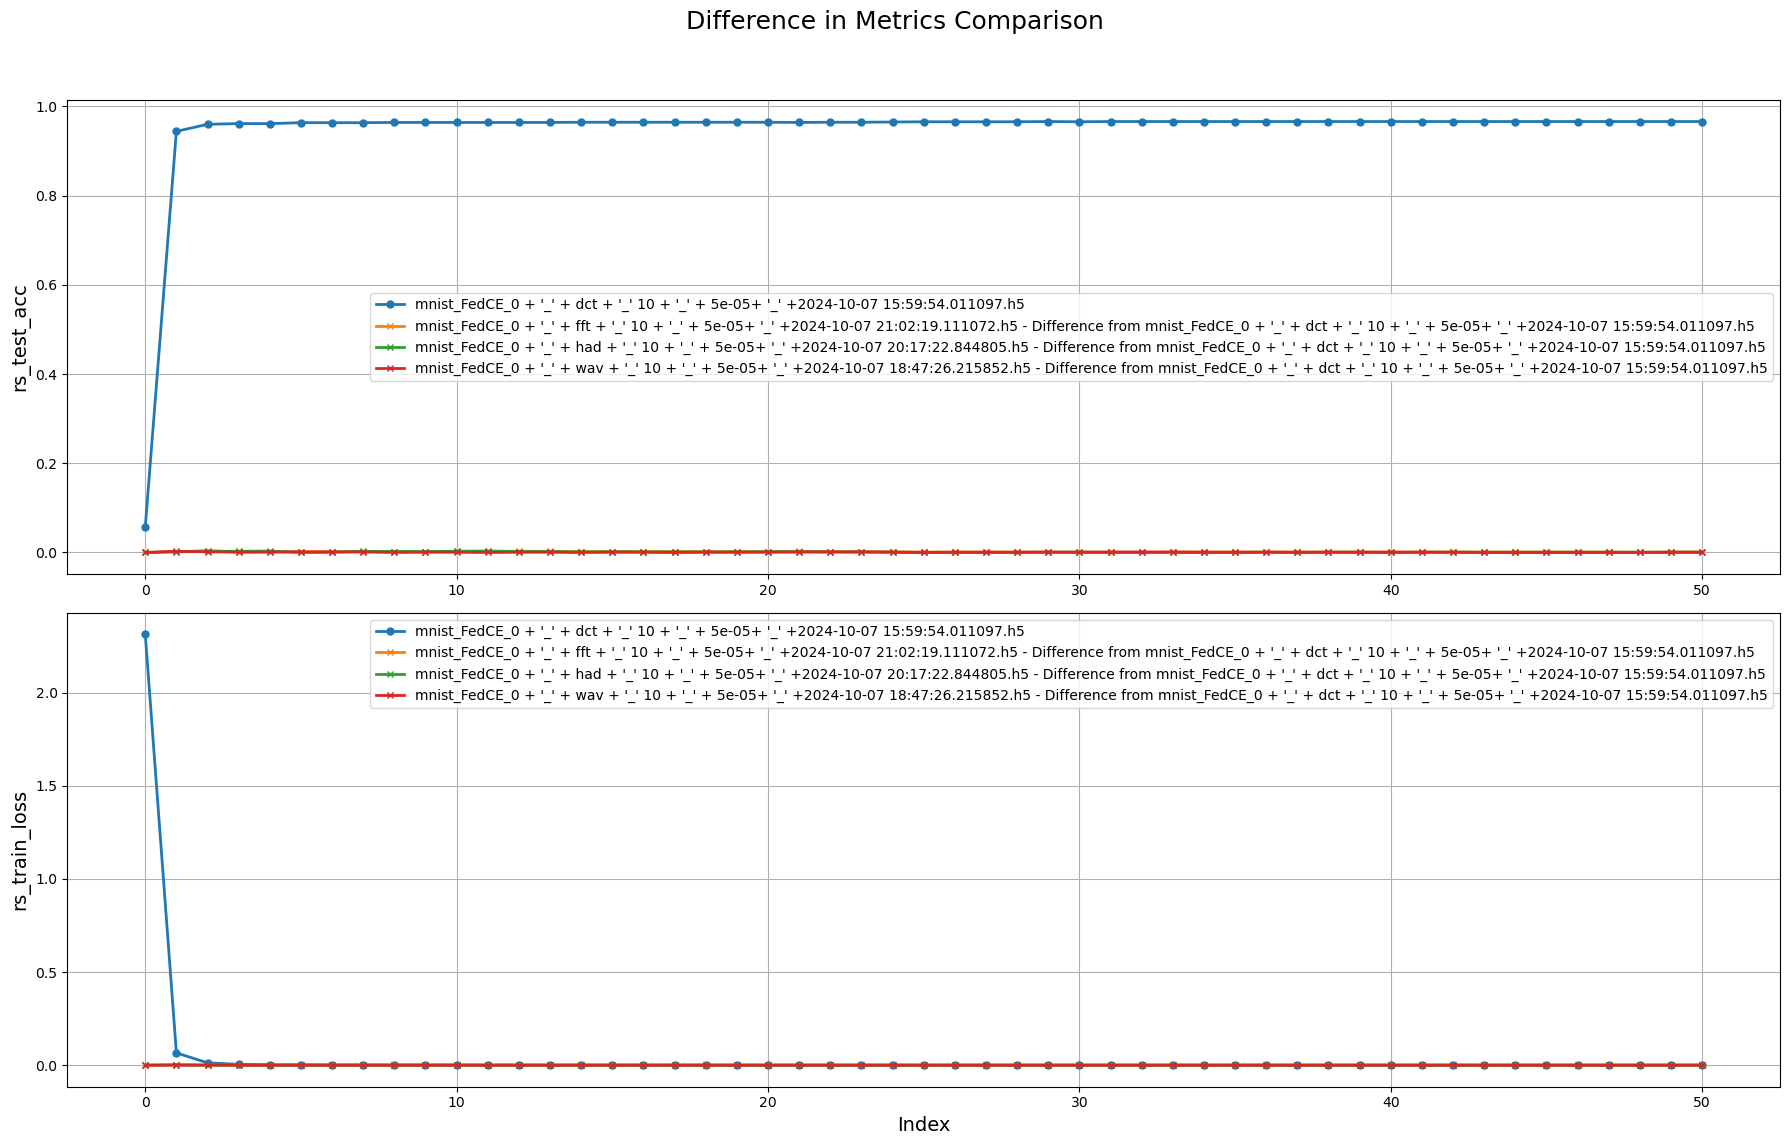

In [5]:
# Create a separate plot for each metric with subsampling
for metric in metrics:
    plt.figure(figsize=(16, 8))  # Increase figure size
    
    for file, data in combined_data[metric].items():
        # Subsample data for better readability (optional, adjust step size)
        subsampled_data = data[::10]  # Take every 10th point for simplicity
        indices = np.arange(len(subsampled_data)) * 10  # Adjust index for subsampling
        
        plt.plot(indices, subsampled_data, label=f'{file} - {metric}', linewidth=2, marker='o', markersize=5)  # Larger markers
    
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.title(f'{metric} Comparison', fontsize=16)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{metric}_comparison.png')
    plt.show()

# Create a combined plot for all metrics with focus on difference between lines
plt.figure(figsize=(18, 12))  # Increase figure size

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)
    
    baseline_file, baseline_data = next(iter(combined_data[metric].items()))  # Use first file as baseline
    
    for file, data in combined_data[metric].items():
        if file != baseline_file:
            difference = np.abs(data - baseline_data)  # Compute difference (or residual) from baseline
            plt.plot(difference, label=f'{file} - Difference from {baseline_file}', linewidth=2, marker='x', markersize=5)
        else:
            plt.plot(data, label=f'{file}', linewidth=2, marker='o', markersize=5)  # Plot baseline
    
    plt.ylabel(metric, fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True)

plt.xlabel('Index', fontsize=14)
plt.suptitle('Difference in Metrics Comparison', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('combined_metrics_difference_comparison.png')
plt.show()

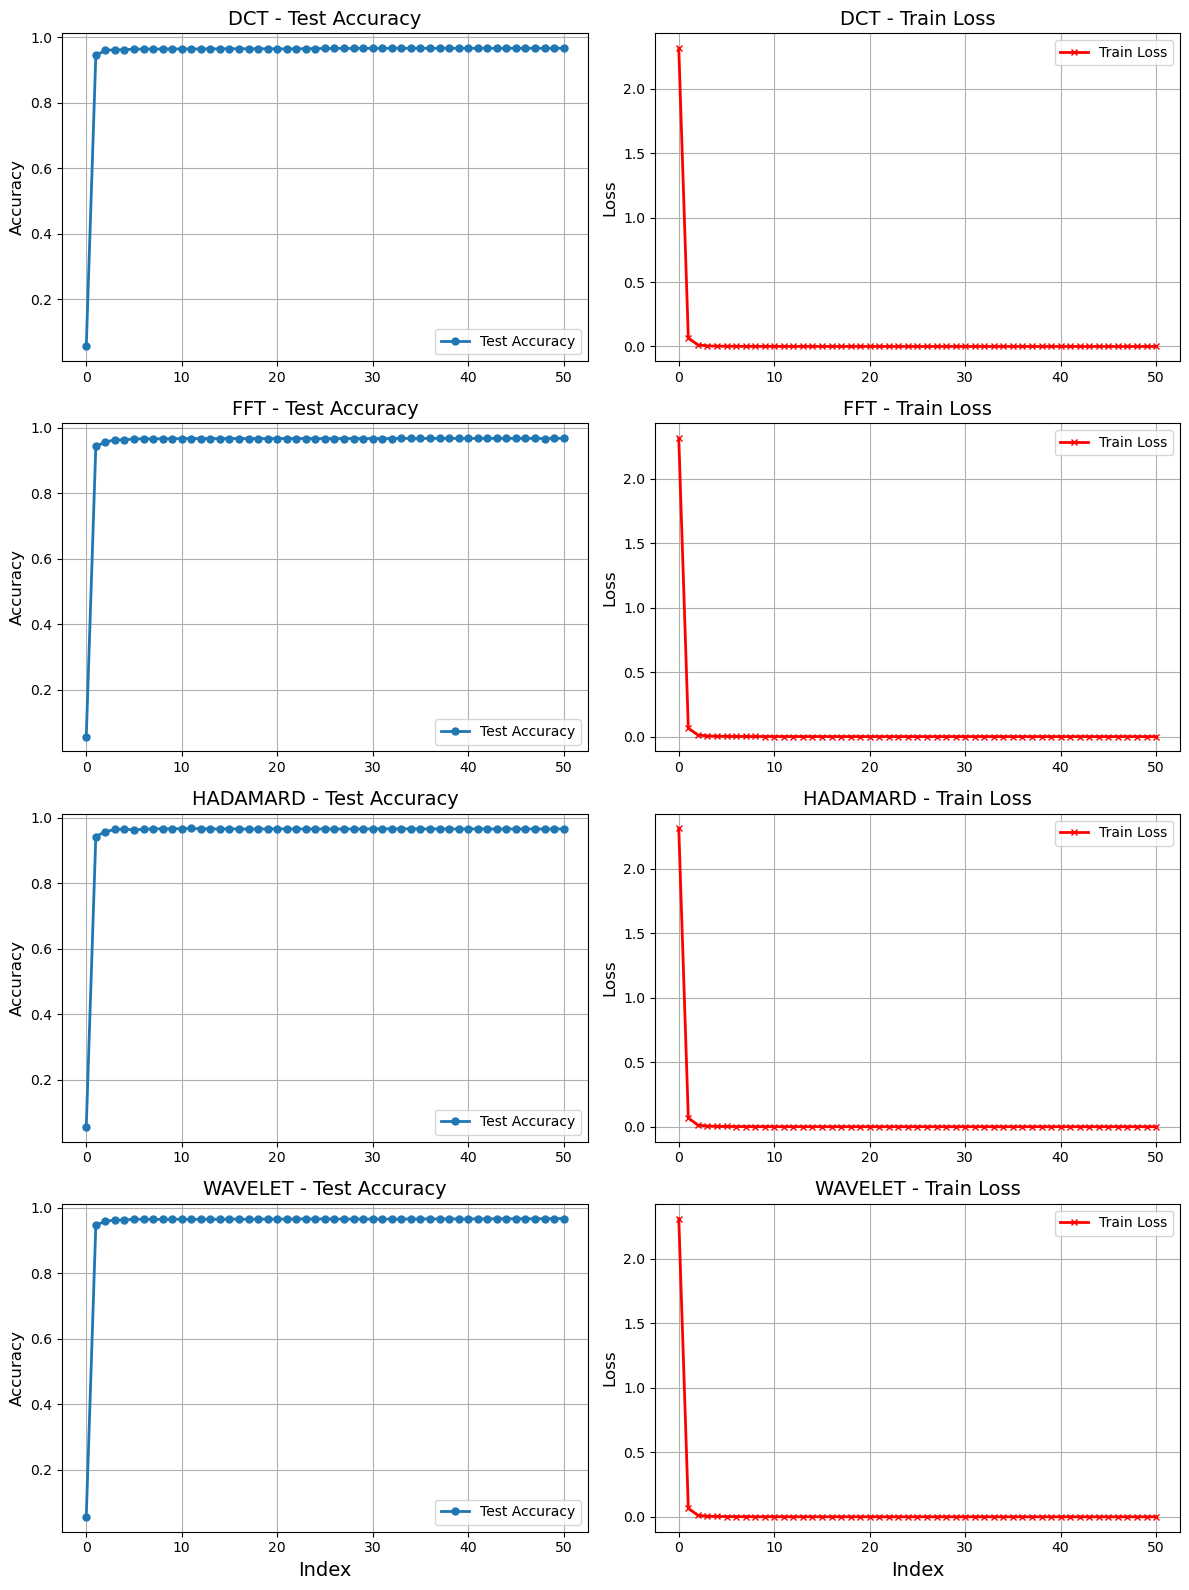

In [6]:
# Metrics to plot
metrics = ['rs_test_acc', 'rs_train_loss']
combined_data = {metric: {} for metric in metrics}
transformation = ['DCT', 'FFT', 'HADAMARD', 'WAVELET']

# Read data from each H5 file
for file in h5_files:
    with h5py.File("/home/lamda/rachu/EPPFL/results/" + file, 'r') as f:
        for metric in metrics:
            if metric in f:
                combined_data[metric][file] = f[metric][()]

# Function to create custom titles from file names
def create_custom_title(file_name):
    # Extract the key parts: transformation type and timestamp
    parts = file_name.split('_')
    transform = parts[3]  # E.g., dct, fft, had, wav
    timestamp = parts[-1].replace('.h5', '')  # Extract the timestamp part and remove ".h5"
    
    # Create a custom title
    return f"Transformation: {transform.upper()}"

# Number of files and metrics to plot
n_files = len(h5_files)
n_metrics = len(metrics)

# Create subplots: 2 rows for each file (one for each metric)
fig, axes = plt.subplots(n_files, n_metrics, figsize=(12, 4 * n_files))

# Flatten axes array to loop through easily if needed
axes = axes.flatten()

# Plot each file's 'rs_test_acc' and 'rs_train_loss' separately
for i, file in enumerate(h5_files):
    # Generate custom title for the file
    custom_title = transformation[i]

    # Plot 'rs_test_acc' for this file
    ax = axes[2 * i]  # Even index for rs_test_acc
    ax.plot(combined_data['rs_test_acc'][file], label='Test Accuracy', linewidth=2, marker='o', markersize=5)
    ax.set_title(f'{custom_title} - Test Accuracy', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.legend(loc='best', fontsize=10)
    ax.grid(True)

    # Plot 'rs_train_loss' for this file
    ax = axes[2 * i + 1]  # Odd index for rs_train_loss
    ax.plot(combined_data['rs_train_loss'][file], label='Train Loss', linewidth=2, marker='x', markersize=5, color='r')
    ax.set_title(f'{custom_title} - Train Loss', fontsize=14)
    ax.set_ylabel('Loss', fontsize=12)
    ax.legend(loc='best', fontsize=10)
    ax.grid(True)

# Set X-axis label only for the bottom row of subplots
for ax in axes[-n_metrics:]:
    ax.set_xlabel('Index', fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('custom_titles_subplots.png')

# Display the plot
plt.show()